In [1]:
!pip install networkx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)


# Graph Construction

In [2]:
import pandas as pd
import networkx as nx
import numpy as np

In [4]:
df = pd.read_excel("SFHH1.xlsx")

In [5]:
G = nx.Graph()

In [6]:
edges = df[["node1", "node2"]].drop_duplicates().values.tolist()

In [7]:
G.add_edges_from(edges)

## Question 1

In [8]:
N = G.number_of_nodes() 
print("Number of Nodes: ", N)

Number of Nodes:  403


In [9]:
E = G.number_of_edges()
print("Number of Edges: ", E)

Number of Edges:  9510


In [10]:
degrees = []
for node, degree in G.degree():
    degrees.append(degree)

In [11]:
avg_degree = np.mean(degrees).round(2)
std_degree = np.std(degrees).round(2)
print("Average Degree: ", avg_degree)
print("Standard Deviation of Degrees: ", std_degree)

Average Degree:  47.2
Standard Deviation of Degrees:  29.95


## Question 2

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# sns.set_style(style = "dark")
sns.set_style("dark")
sns.set_palette("bone")

Text(0.5, 1.0, 'Degree Distribution')

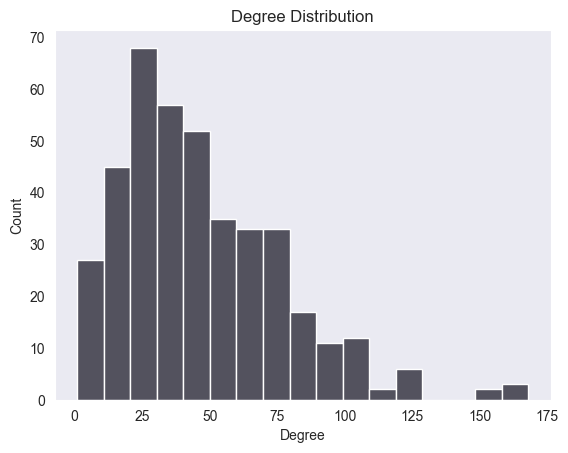

In [14]:
d_viz = sns.histplot(degrees)
d_viz.set_xlabel('Degree')
d_viz.set_ylabel('Count')
d_viz.set_title('Degree Distribution')

## Question 3

In [17]:
rho_D = nx.degree_assortativity_coefficient(G)
print("Degree assortativity: ", rho_D)

Degree assortativity:  -0.08001195267658665


## Question 4

In [19]:
C = nx.average_clustering(G)
print("Clustering coefficient: ", C)

Clustering coefficient:  0.27752342886036674


## Question 5

In [21]:
Eh = nx.average_shortest_path_length(G)
Hmax = nx.diameter(G)
print("Average Hopcount: ", Eh)
print("Diameter of Graph: ", Hmax)

Average Hopcount:  1.955211535375233
Diameter of Graph:  4


## Question 7

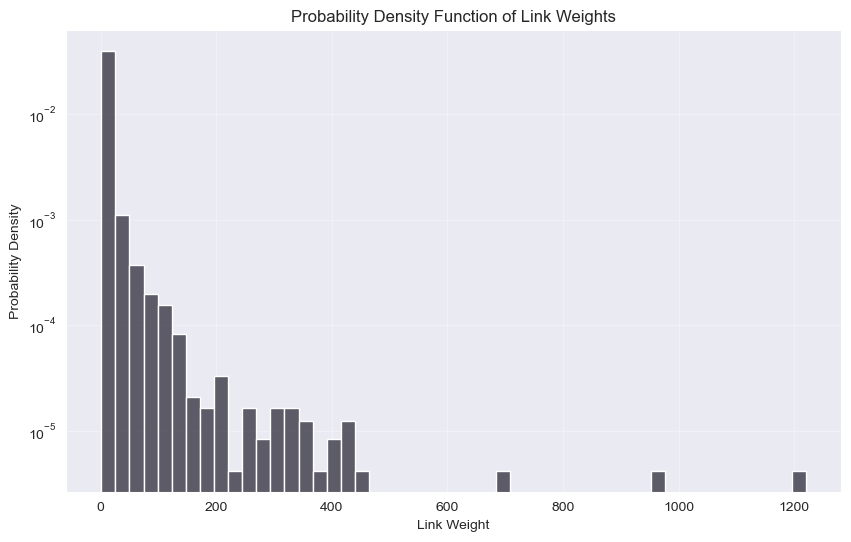

In [26]:

link_weights = df.groupby(['node1', 'node2']).size().values

plt.figure(figsize=(10, 6))
sns.histplot(link_weights, bins=50, stat='density', alpha=0.7)
plt.xlabel('Link Weight')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Link Weights')
plt.yscale('log') 
plt.grid(True, alpha=0.3)
plt.show()

## Question 8

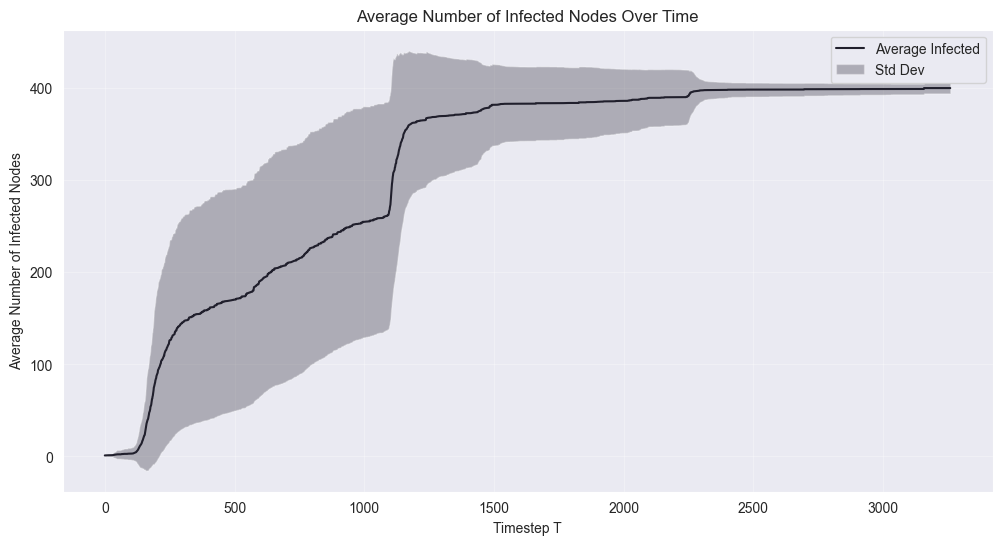

In [19]:
# Setup
df_sorted = df.sort_values('timestamp')
all_nodes = list(G.nodes())
T = df_sorted['timestamp'].max()
N = len(all_nodes)

# Store infection counts for each iteration
infTime_all = np.zeros((N, T+1))

for idx, seed in enumerate(all_nodes):
    infected = set([seed])
    infected_time = {seed: 0}
    infTime = np.zeros(T+1)
    infTime[0] = 1

    for t in range(1, T+1):
        # Get all contacts at time t
        contacts = df_sorted[df_sorted['timestamp'] == t][['node1', 'node2']].values
        new_infected = set()
        for n1, n2 in contacts:
            if n1 in infected and n2 not in infected:
                new_infected.add(n2)
            elif n2 in infected and n1 not in infected:
                new_infected.add(n1)
        infected.update(new_infected)
        infTime[t] = len(infected)
    infTime_all[idx] = infTime

# Calculate average and std deviation over all seeds
avg_inf = infTime_all.mean(axis=0)
std_inf = infTime_all.std(axis=0)

# Plot
plt.figure(figsize=(12,6))
plt.plot(range(T+1), avg_inf, label='Average Infected')
plt.fill_between(range(T+1), avg_inf-std_inf, avg_inf+std_inf, alpha=0.3, label='Std Dev')
plt.xlabel('Timestep T')
plt.ylabel('Average Number of Infected Nodes')
plt.title('Average Number of Infected Nodes Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Question 9

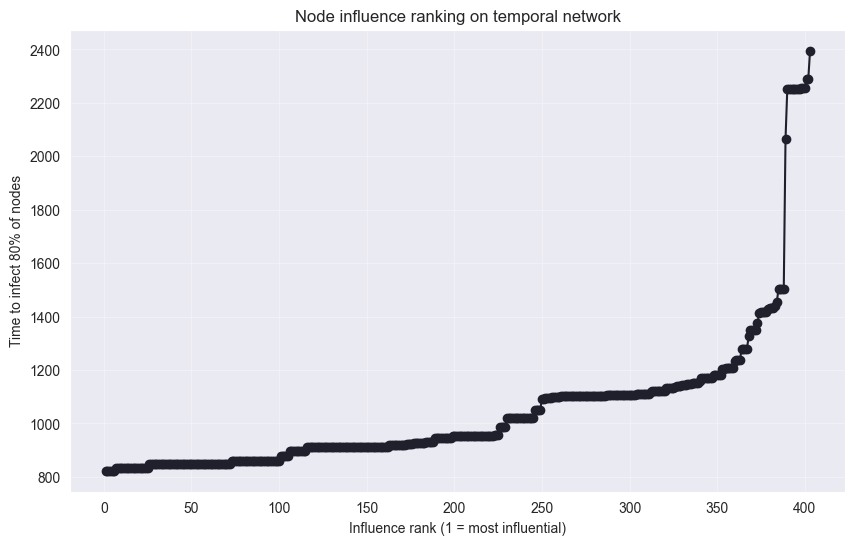

In [22]:

threshold = int(0.8 * N)   # 80% of all nodes
times_to_threshold = []

for idx, seed in enumerate(all_nodes):
    infected_counts = infTime_all[idx, :]
    reach_times = np.where(infected_counts >= threshold)[0]
    if len(reach_times) > 0:
        t_star = reach_times[0]   # first time reaching 80%
    else:
        t_star = np.inf           # never reached threshold
    times_to_threshold.append((seed, t_star))

# Sort by time to reach 80%
times_to_threshold.sort(key=lambda x: x[1])

# Ranking vector R (node indices in order of influence)
R = [seed for seed, _ in times_to_threshold]

# Sorted times for plotting
sorted_times = [t for _, t in times_to_threshold]

# Plot influence ranking
plt.figure(figsize=(10,6))
plt.plot(range(1, N+1), sorted_times, marker='o', linestyle='-')
plt.xlabel("Influence rank (1 = most influential)")
plt.ylabel("Time to infect 80% of nodes")
plt.title("Node influence ranking on temporal network")
plt.grid(True, alpha=0.3)
plt.show()
